# System Optimisation & Machine Learning
## Workshop 1 Report
### Yutao Wang 807339

**4 ways of drawing in Juypter Notebook**

**Option 1**: Use `%matplotlib notebook` to get zoom-able & resize-able notebook. This is the best for quick tests where you need to work interactively.But only 1 zoomable notebook can be active. If you don't deactivate it, you can't draw another and get weird bugs in the following cells. 

**Option 2**: Use `%matplotlib ipympl`. This is very similar with `%matplotlib notebook`. But don't recommend to use it. 

**Option 3**: Use `%matplotlibe inline`. This only draws the images, not interactive / zoom-able but it works well. I recommend to change figure size to be bigger than the default in most cases (see notes below on how).

**Option 4**: use `import mpld3` and `mpld3.enable_notebook()`. This creates zoom-able (interactive) plots and supports more than one plot at the same time. You should set figure size manually (see below on how to do it) as figure sizes are not adjustable. Note that the interactive tools are hidden until you pass the mouse over the plot.



**1. np.linspace()**

`np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)`

**2. np.ones()**

`np.ones(shape, dtype=None, order='C)`

e.g. np.ones(5) = [1., 1., 1., 1., 1.]

**3. np.outer()**

`np.outer(a, b, out=None)`

Given 2 vectors a and b, np.outer(a,b) = 
$$ \begin{bmatrix} a0*b0 & a0*b1 & ... & a0*bN \\ a1*b0 & ...& ...& ... \\  ...& ...& ...& ...\\ aM*b0 & ... & ... & aM*bN \end{bmatrix} $$

In [21]:
# Draws not interactive / zoom-able images
%matplotlib inline
# Numpy is a core scientific computing library for python. 
# It provides a high-performance multidimensional array object, 
# and tools for working with these arrays.
import numpy as np
import matplotlib.pyplot as plt

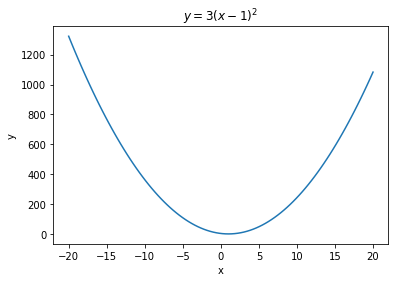

In [22]:
# define function f(x)
def f(x):
    return 3*(x-1)**2

# define x and y
x = np.linspace(-20, 20, 100) # 100 equally spaced points on interval [-20,20]
y = f(x) # call function f(x) and set y to the function's return value

# Plot the function y=f(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y=3(x-1)^2$')
plt.show()

### Question 1.1
Draw 1 convex function

**rosenbrock function:**
$ f(x,y) = (a - x)^2 + b( y - x^2)^2 $


<IPython.core.display.Javascript object>


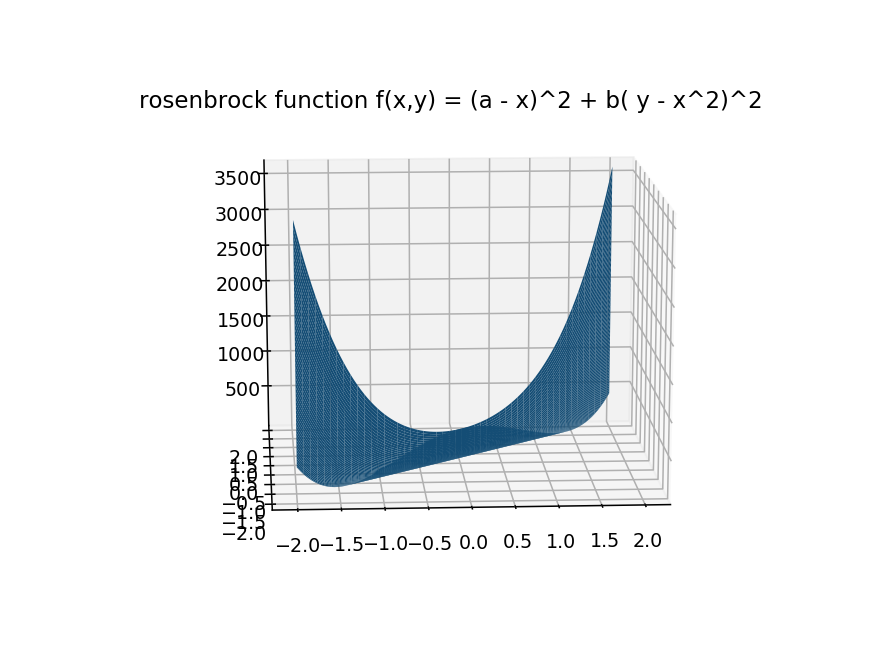

In [32]:
# Draw 1 convex 3D rosenbrock function f(x,y) = (a - x)^2 + b( y - x^2)^2

# Use %matplotlib notebook to get zoom-able & resize-able notebook.
# But you can only draw 1 interactive graph, and must deactive it after drawing. 
%matplotlib notebook
from scipy.optimize import rosen
from mpl_toolkits.mplot3d import Axes3D

# Enable 3D axis background
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

a = 1
b = 100
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
xx,yy = np.meshgrid(x,y)
f = ( a - xx )**2 + b*( yy - xx**2 )**2

ax.plot_surface(x,y,f)
ax.set_title('rosenbrock function f(x,y) = (a - x)^2 + b( y - x^2)^2')
plt.show()

<IPython.core.display.Javascript object>


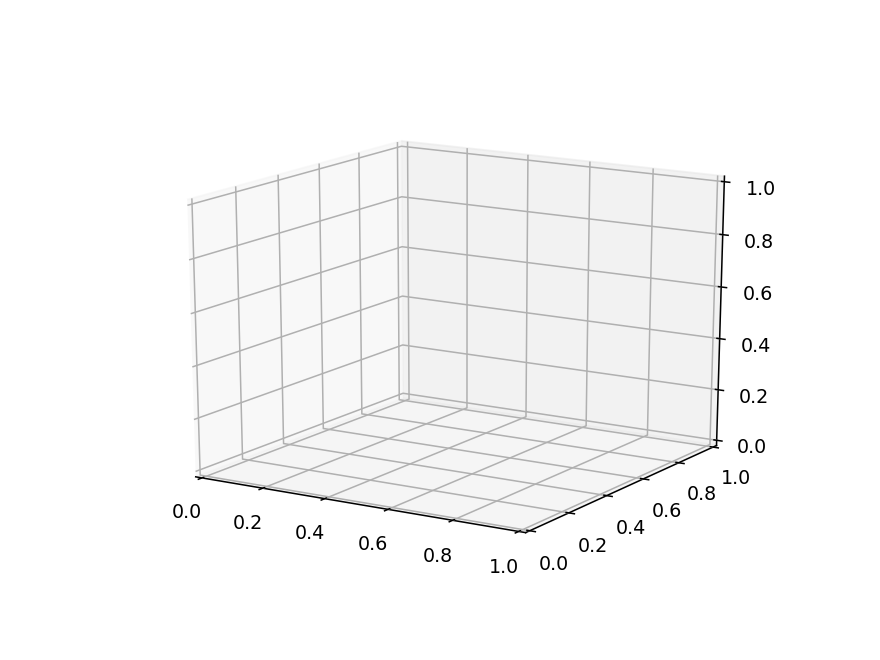

ValueError: Argument Z must be 2-dimensional.

In [33]:
# Draw 1 non-convex 3D function: z = - x^2 - y^2

# Use %matplotlib notebook to get zoom-able & resize-able notebook.
# But you can only draw 1 interactive graph, and must deactive it after drawing. 
%matplotlib notebook
from scipy.optimize import rosen
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
[xx,yy] = np.meshgrid(x,y)
z = -x**2 - y**2

# Enable 3D axis background
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x,y,z)
ax.set_title('z = - x^2 - y^2')
plt.show()




### Question 1.2

single variable !!!!!!!!!!!!!!!!!


In order to determine the object function $f(x)$ is convex or concave, we need to find all eigenvalues of Hessian matrix $H$ or $\bigtriangledown^2 f(x)$.

1. If all eigenvalues are non-positive, the Hessian matrix is called "positive semi-definete". Hence, object function $f(x)$ is convex.

2. If all eigenvalues are positive, the Hessian matrix is called "negative semi-definete". Hence, object function $f(x)$ is concave

3. If there exist both positive(include 0) and negative eigenvalues, the object function $f(x)$ is neither convex, nor concave

### Question 1.3

??????????????????

### Question 2.1

By intuition, the objective function should be a concave function which has the maximum point at probability p = 0.5. 

**Unconstraint problem**: In fact, this problem has the constraint $0 < p < 1$. However, by common sense, we know that the optimal solution $p^*$ is definetely not lay outside of the boundary [0, 1]. Therefore, we can treat this question as an unsconstraint problem. 

**Decision variable**: transmission attempt probability, p, which is the same for all N nodes.






### Question 2.2
Plot with N=10

Objective function: $ f(p) = Np(1-p)^{N-1}$ is plotted below (left graph). It is distorted bell-shaped and has the peak at about $p = 0.1$. 

Let's check convex/concave with mathematical methods. In order to determine a fucntion is convex/concave, we need to find its $2^{nd}$ derivative: 

$$ 2^{nd} derivative = \frac{\partial^{2} f}{\partial^{2} p}  = N(N-1)(1-p)^{N-3}(Np-2) $$

Substitute $N = 10$, so $$ 2^{nd} derivative =  90(1-p)^{7}(10p-2)$$

According to methas definition: 
- If objective function's 2nd derivative > 0, the objective function is strictly convex.
- If objective function's 2nd derivative < 0, the objective function is strictly concave.

The 2nd derivative graph is plotted below as well. 
- For some p values, the 2nd derivative $\geq$ 0
- For some p values, the 2nd derivative $\leq$ 0

Hence, the objective function $f(x)$ is neither convex, nor concave.


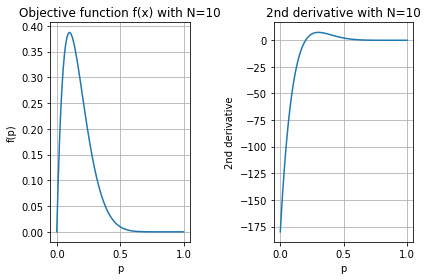

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function f(p)
def f(N,p):
    return N*p*(1-p)**(N-1)

# 2nd order derivative of objective function
def d2f(N,p):
    return N*(N-1)*(1-p)**(N-3)*(N*p-2)

p = np.linspace(0, 1, 100)
N = 10
y = f(N,p)

plt.subplot(1,2,1)
plt.plot(p,y)
plt.xlabel('p')
plt.ylabel('f(p)')
plt.title('Objective function f(x) with N=%d'% N)
plt.grid()


y2 = d2f(N,p)
plt.subplot(1,2,2)
plt.plot(p,y2)
plt.xlabel('p')
plt.ylabel('2nd derivative')
plt.title('2nd derivative with N=%d'%N)


# Add grid lines on graphs
plt.grid()
# Auto-adjust the distance between 2 graphs
plt.tight_layout()
plt.show()


# How to add more grid lines on the graph ??????????????????????

### Question 2.3

**Solve by Scipy package**

see the following cell ?????????????????????



**Solve by maths method**

In order to find the optimal probabiliy $p^{*}$, we need to find the solution of 1st order derivative of the objctive function $f^{'}(p^{*}) = 0$.

$$f^{'}(p^{*}) = N（1-Np^{*}）(1-p^{*})^{N-2} = 0$$

Substitude N = 10, we get
$$ 10(1-10p^{*})(1-p^{*})^{8}) = 0$$

To solve this, since the right hand side = 0. Because $ 0 < p < 1$, we can know that:
$$(1-p^{*})^{8} \neq 0$$
So we simply need to make sure that: 
$$ 1-10p^{*}=0 $$ 
Hence, the optimal solution is $p^{*} = 0.1 $. The maths result matches the observation from the left graph above. 


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define objective function f(p)
def f(p):
    return N*p*(1-p)**(N-1)

p = np.linspace(0, 1, 100)
N = 10
# Minimization of scalar function of one variable.
res = minimize_scalar(f)


C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys


### Question 2.4




### Question 2.5




### Question 3.1




### Question 3.2




### Question 3.3




### Question 3.4


